<a href="https://colab.research.google.com/github/Ishashianand/smart-home-iot-dataset/blob/main/Smart_Home_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Home Dataset with Weather Information

**Table Of Contents**
1. Data Pre-processing
2. Data Transformation
3. Data Visualization
4. Correlation between features
5. Time-Series Analysis
6. Anomaly Detection
7. Time-Series Forecasting

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.ensemble import IsolationForest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose


## Part 1 - Data Pre-processing

**Import CSV file from Google Drive.**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
home_df = pd.read_csv("/content/gdrive/MyDrive/HomeC.csv")
home_df

<ipython-input-3-70cc7a03f856>:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  home_df = pd.read_csv("/content/gdrive/MyDrive/HomeC.csv")


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
0               0.006983  ...       10.00       Clear                29.26   
1               0.006983  ...       10.00       Clear                29.26   
2               0.006983  ...       10.00       Clear                29.26   
3               0.006983  ...       10.00       Clear                29.26   
4               0.006850  ...       10.00       Clear                29.26   
...                  ...  ...         ...         ...                  ...   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0        1016.91       9.18  cloudCover        282.0           0.0000   
1        1016.91       9.18  cloudCover        282.0           0.0000   
2        1016.91       9.18  cloudCover        282.0           0.0000   
3        1016.91       9.18  cloudCover        282.0           0.0000   
4        1016.91       9.18  cloudCover        282.0           0.0000   
...          ...        ...         ...          ...              ...   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
0          24.40               0.00  
1          24.40               0.00  
2          24.40               0.00  
3          24.40               0.00  
4          24.40               0.00  
...          ...                ...  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0

In [ ]:
home_df.tail(5)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0.51  
503909     31.27               0.51  
503910       NaN                NaN  

[5 rows x 32 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Remove the last row that contains invalid values.**

In [ ]:
#Removing the last row as it is invalid
home_df = home_df[0:-1]

In [ ]:
home_df.tail(5)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
503905  1452128305  1.601233  0.003183            1.601233         0.000050   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
503905        0.085267        0.642417          0.041783     0.005267   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
503905          0.008667  ...        8.74  Light Rain                29.45   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
503905   1011.49       6.72        0.31        186.0           0.0101   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   

        dewPoint  precipProbability  
503905     31.27               0.51  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0.51  
503909     31.27               0.51  

[5 rows x 32 columns]

**The column names contain the unit value in the title. Remove the [kW] the columns.**

In [ ]:
#Removing [kW] from column names
home_df.columns = [col.replace(' [kW]', '') for col in home_df.columns]
home_df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [ ]:
home_df.head()

time       use       gen  House overall  Dishwasher  Furnace 1  \
0  1451624400  0.932833  0.003483       0.932833    0.000033   0.020700   
1  1451624401  0.934333  0.003467       0.934333    0.000000   0.020717   
2  1451624402  0.931817  0.003467       0.931817    0.000017   0.020700   
3  1451624403  1.022050  0.003483       1.022050    0.000017   0.106900   
4  1451624404  1.139400  0.003467       1.139400    0.000133   0.236933   

   Furnace 2  Home office    Fridge  Wine cellar  ...  visibility  summary  \
0   0.061917     0.442633  0.124150     0.006983  ...        10.0    Clear   
1   0.063817     0.444067  0.124000     0.006983  ...        10.0    Clear   
2   0.062317     0.446067  0.123533     0.006983  ...        10.0    Clear   
3   0.068517     0.446583  0.123133     0.006983  ...        10.0    Clear   
4   0.063983     0.446533  0.122850     0.006850  ...        10.0    Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   
2                29.26   1016.91       9.18  cloudCover        282.0   
3                29.26   1016.91       9.18  cloudCover        282.0   
4                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0  

[5 rows x 32 columns]

**There are multiple columns of similar rooms in the dataset. For example, there is 'Furnace 1' and 'Furnace 2'. We can remove the additional columns by summing them.**

In [ ]:
#Summing the columns 'Furnace 1' and 'Furnace 2' since we only need the total energy usage by both the furnaces
home_df['Furnace'] = home_df[['Furnace 1','Furnace 2']].sum(axis=1)


<ipython-input-10-a3612ed17ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Furnace'] = home_df[['Furnace 1','Furnace 2']].sum(axis=1)


In [ ]:
#Finding the average usage of all kitchens('Kitchen 12','Kitchen 14','Kitchen 38')
home_df['Kitchen'] = home_df[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

<ipython-input-11-fa1210810d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Kitchen'] = home_df[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)


In [ ]:
#Dropping old columns on which the aggregation have been done
home_df = home_df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)

In [ ]:

home_df.head()

time       use       gen  House overall  Dishwasher  Home office  \
0  1451624400  0.932833  0.003483       0.932833    0.000033     0.442633   
1  1451624401  0.934333  0.003467       0.934333    0.000000     0.444067   
2  1451624402  0.931817  0.003467       0.931817    0.000017     0.446067   
3  1451624403  1.022050  0.003483       1.022050    0.000017     0.446583   
4  1451624404  1.139400  0.003467       1.139400    0.000133     0.446533   

     Fridge  Wine cellar  Garage door      Barn  ...  apparentTemperature  \
0  0.124150     0.006983     0.013083  0.031350  ...                29.26   
1  0.124000     0.006983     0.013117  0.031500  ...                29.26   
2  0.123533     0.006983     0.013083  0.031517  ...                29.26   
3  0.123133     0.006983     0.013000  0.031500  ...                29.26   
4  0.122850     0.006850     0.012783  0.031500  ...                29.26   

   pressure  windSpeed  cloudCover  windBearing precipIntensity  dewPoint  \
0   1016.91       9.18  cloudCover        282.0             0.0      24.4   
1   1016.91       9.18  cloudCover        282.0             0.0      24.4   
2   1016.91       9.18  cloudCover        282.0             0.0      24.4   
3   1016.91       9.18  cloudCover        282.0             0.0      24.4   
4   1016.91       9.18  cloudCover        282.0             0.0      24.4   

   precipProbability   Furnace   Kitchen  
0                0.0  0.082617  0.000189  
1                0.0  0.084533  0.000189  
2                0.0  0.083017  0.000206  
3                0.0  0.175417  0.000217  
4                0.0  0.300917  0.000261  

[5 rows x 29 columns]

**The column 'time' is in unix timestamp. Convert the timestamp to date and time.**

In [ ]:

#Finding the start time
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(home_df['time'].iloc[0]))))


 start  2016-01-01 05:00:00


In [ ]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min
time_index = pd.date_range('2016-01-01 05:00', periods=len(home_df),  freq='min')
time_index = pd.DatetimeIndex(time_index)
home_df = home_df.set_index(time_index)
home_df = home_df.drop(['time'], axis=1)
home_df.iloc[np.r_[0:5,-5:0]].iloc[:,0]

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

**Examine the data type of each column.**

In [ ]:
#Display dataframe info
home_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   House overall        503910 non-null  float64
 3   Dishwasher           503910 non-null  float64
 4   Home office          503910 non-null  float64
 5   Fridge               503910 non-null  float64
 6   Wine cellar          503910 non-null  float64
 7   Garage door          503910 non-null  float64
 8   Barn                 503910 non-null  float64
 9   Well                 503910 non-null  float64
 10  Microwave            503910 non-null  float64
 11  Living room          503910 non-null  float64
 12  Solar                503910 non-null  float64
 13  temperature          503910 non-null  float64
 14  icon                 50391

In [ ]:
#Drop columns 'icon' and 'summary' as their data type is 'object'
home_df = home_df.drop(['icon', 'summary'], axis=1)

In [ ]:
#Examining the unique values of the attribute 'cloudCover' to see if there is any invalid data that needs to be handled
home_df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [ ]:
#We see that for some rows we have an invalid value for cloudCover.
home_df[home_df['cloudCover'] == 'cloudCover'].shape

(58, 26)

In [ ]:
#We replace these missing values with the next valid observation we have
home_df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
home_df['cloudCover'] = home_df['cloudCover'].astype('float')

<ipython-input-20-737a5263601a>:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  home_df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)


In [ ]:
#It seems use and House overall show the same data
home_df[['use', 'House overall']].head()

use  House overall
2016-01-01 05:00:00  0.932833       0.932833
2016-01-01 05:01:00  0.934333       0.934333
2016-01-01 05:02:00  0.931817       0.931817
2016-01-01 05:03:00  1.022050       1.022050
2016-01-01 05:04:00  1.139400       1.139400

In [ ]:
# Let's visualize these use and House overall to confirm they show the same data so that we could remove one of the columns
fig, axes = plt.subplots(nrows=2, ncols=1)
home_df['use'].resample('D').mean().plot(ax=axes[0])
home_df['House overall'].resample('D').mean().plot(ax=axes[1])

<Axes: >

In [ ]:
#Since the above plot confirms both the columns indicate the same data lets go ahead and remove 'House overall'
home_df = home_df.drop(columns=['House overall'])
home_df.shape

(503910, 25)

<Axes: >

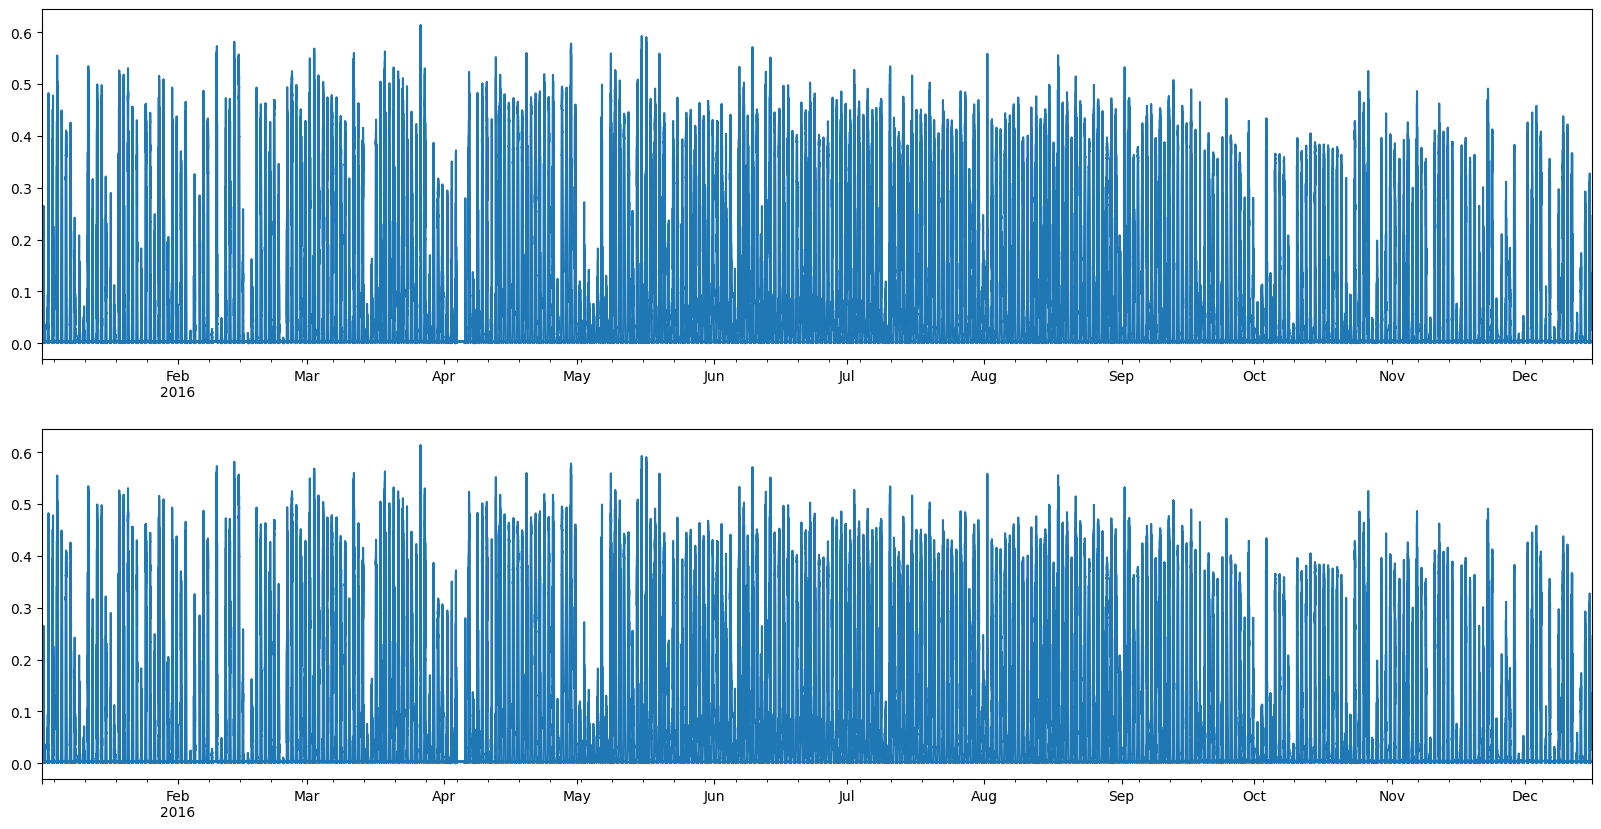

In [ ]:
#Similarly, the attributes 'gen' and 'Solar' show the same data. Let's visualize these two columns to confirm the same
fig, axes = plt.subplots(nrows=2, ncols=1)
home_df['gen'].plot(ax=axes[0],figsize=(20,10))
home_df['Solar'].plot(ax=axes[1],figsize=(20,10))

In [ ]:
#Dropping the column 'Solar' since it shows the same data as 'gen'
home_df = home_df.drop(columns=['Solar'])
home_df.shape

(503910, 24)

## Part 2 - Data Transformation

In [ ]:

#Creating two separate dataframe objects with energy and weather data respectively.
energy_data = home_df.filter(items=[ 'gen', 'use', 'Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room'])

weather_data = home_df.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])

In [ ]:
energy_data.head()

gen       use  Dishwasher   Furnace  Home office  \
2016-01-01 05:00:00  0.003483  0.932833    0.000033  0.082617     0.442633   
2016-01-01 05:01:00  0.003467  0.934333    0.000000  0.084533     0.444067   
2016-01-01 05:02:00  0.003467  0.931817    0.000017  0.083017     0.446067   
2016-01-01 05:03:00  0.003483  1.022050    0.000017  0.175417     0.446583   
2016-01-01 05:04:00  0.003467  1.139400    0.000133  0.300917     0.446533   

                       Fridge  Wine cellar  Garage door   Kitchen      Barn  \
2016-01-01 05:00:00  0.124150     0.006983     0.013083  0.000189  0.031350   
2016-01-01 05:01:00  0.124000     0.006983     0.013117  0.000189  0.031500   
2016-01-01 05:02:00  0.123533     0.006983     0.013083  0.000206  0.031517   
2016-01-01 05:03:00  0.123133     0.006983     0.013000  0.000217  0.031500   
2016-01-01 05:04:00  0.122850     0.006850     0.012783  0.000261  0.031500   

                         Well  Microwave  Living room  
2016-01-01 05:00:00  0.001017   0.004067     0.001517  
2016-01-01 05:01:00  0.001017   0.004067     0.001650  
2016-01-01 05:02:00  0.001000   0.004067     0.001650  
2016-01-01 05:03:00  0.001017   0.004067     0.001617  
2016-01-01 05:04:00  0.001017   0.004067     0.001583

In [ ]:
weather_data.head()

temperature  humidity  visibility  apparentTemperature  \
2016-01-01 05:00:00        36.14      0.62        10.0                29.26   
2016-01-01 05:01:00        36.14      0.62        10.0                29.26   
2016-01-01 05:02:00        36.14      0.62        10.0                29.26   
2016-01-01 05:03:00        36.14      0.62        10.0                29.26   
2016-01-01 05:04:00        36.14      0.62        10.0                29.26   

                     pressure  windSpeed  windBearing  dewPoint  
2016-01-01 05:00:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:01:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:02:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:03:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:04:00   1016.91       9.18        282.0      24.4

In [ ]:
#Generating the data per day
energy_per_day = energy_data.resample('D').sum()
energy_per_day.head()

gen          use  Dishwasher     Furnace  Home office  \
2016-01-01   18.026200  1366.269517   59.517171  492.020017    64.668783   
2016-01-02   76.051300  1851.521067   63.154404  683.761967   145.570317   
2016-01-03   74.081433  1651.128133  105.508668  613.630533   196.064167   
2016-01-04  108.525017  1500.686017   58.880760  605.129767   180.650867   
2016-01-05  148.107500  1597.968867   72.973254  817.065250   133.360867   

               Fridge  Wine cellar  Garage door   Kitchen        Barn  \
2016-01-01  94.740300    29.093367    15.228367  3.873278   99.622950   
2016-01-02  74.851733    24.096767    19.246333  5.154752  185.776967   
2016-01-03  92.149033    32.989533    19.444933  6.364001  146.493667   
2016-01-04  71.016683    20.980700    19.249983  5.782085   47.837017   
2016-01-05  80.135633    30.792300    19.773067  4.918163   50.166067   

                 Well  Microwave  Living room  
2016-01-01  30.537233  12.961117    77.071667  
2016-01-02  33.688133  12.480300    71.142950  
2016-01-03  31.955233  19.066117    42.779250  
2016-01-04  43.438883  20.249933    93.077467  
2016-01-05  19.157417  16.658967    44.483650

In [ ]:
#Generating the data per week
energy_per_week = energy_data.resample('W').sum()
energy_per_week.head()

gen           use  Dishwasher      Furnace  Home office  \
2016-01-03  168.158933   4868.918717  228.180243  1789.412517   406.303267   
2016-01-10  572.221083  10281.065683  322.905918  4309.503517  1060.328917   
2016-01-17  446.667833  10365.530000  415.871596  4661.908917  1036.034600   
2016-01-24  773.163450  11446.274100  328.069396  5650.391533   845.905650   
2016-01-31  636.354167   9294.364817  318.545145  3861.230900   695.367683   

                Fridge  Wine cellar  Garage door    Kitchen        Barn  \
2016-01-03  261.741067    86.179667    53.919633  15.392031  431.893583   
2016-01-10  595.732950   180.574800   139.934433  34.102771  691.477933   
2016-01-17  538.311483   201.654983   138.471933  34.200943  467.751483   
2016-01-24  501.469017   177.311500   136.808333  35.232993  871.137733   
2016-01-31  539.017367   195.041583   135.907333  35.082345  851.749650   

                  Well   Microwave  Living room  
2016-01-03   96.180600   44.507533   190.993867  
2016-01-10  161.061051  104.610683   475.712567  
2016-01-17  165.124600   90.808833   446.148850  
2016-01-24  173.225900   88.269900   431.383199  
2016-01-31  170.518450  101.335400   376.918150

In [ ]:
#Generating the data per month
energy_per_month = energy_data.resample('M').sum()
energy_per_month.head()

gen           use   Dishwasher       Furnace  Home office  \
2016-01-31  2596.565467  46256.153317  1613.572299  20272.447383  4043.940117   
2016-02-29  2704.221700  41558.035267  1399.090831  19171.333067  2850.642583   
2016-03-31  3795.807367  34026.880883  1506.501997  13046.526433  3511.736400   
2016-04-30  3893.534950  29662.845900  1443.403725   9393.876000  3173.250717   
2016-05-31  3670.712050  25550.843150  1180.812253   5957.877471  2768.990462   

                 Fridge  Wine cellar  Garage door     Kitchen         Barn  \
2016-01-31  2436.271883   840.762533   605.041667  154.011083  3314.010383   
2016-02-29  2225.080050   832.488483   572.159733  137.273728  2817.221550   
2016-03-31  2393.101050  1268.479517   614.368167  134.469697  1791.915983   
2016-04-30  2454.983017  1548.467600   627.425083  103.812260  2626.763767   
2016-05-31  2648.659933  1561.469854   617.532683   99.109124  3321.740146   

                  Well   Microwave  Living room  
2016-01-31  766.110601  429.532350  1921.156633  
2016-02-29  741.079083  388.025434  1408.870900  
2016-03-31  731.827333  426.910884  1585.980033  
2016-04-30  658.356017  488.510350  1571.712033  
2016-05-31  450.940233  406.917284  1179.055583

## Part 3 - Data Visualization

<Axes: title={'center': 'Overall energy consumption in kW per day'}>

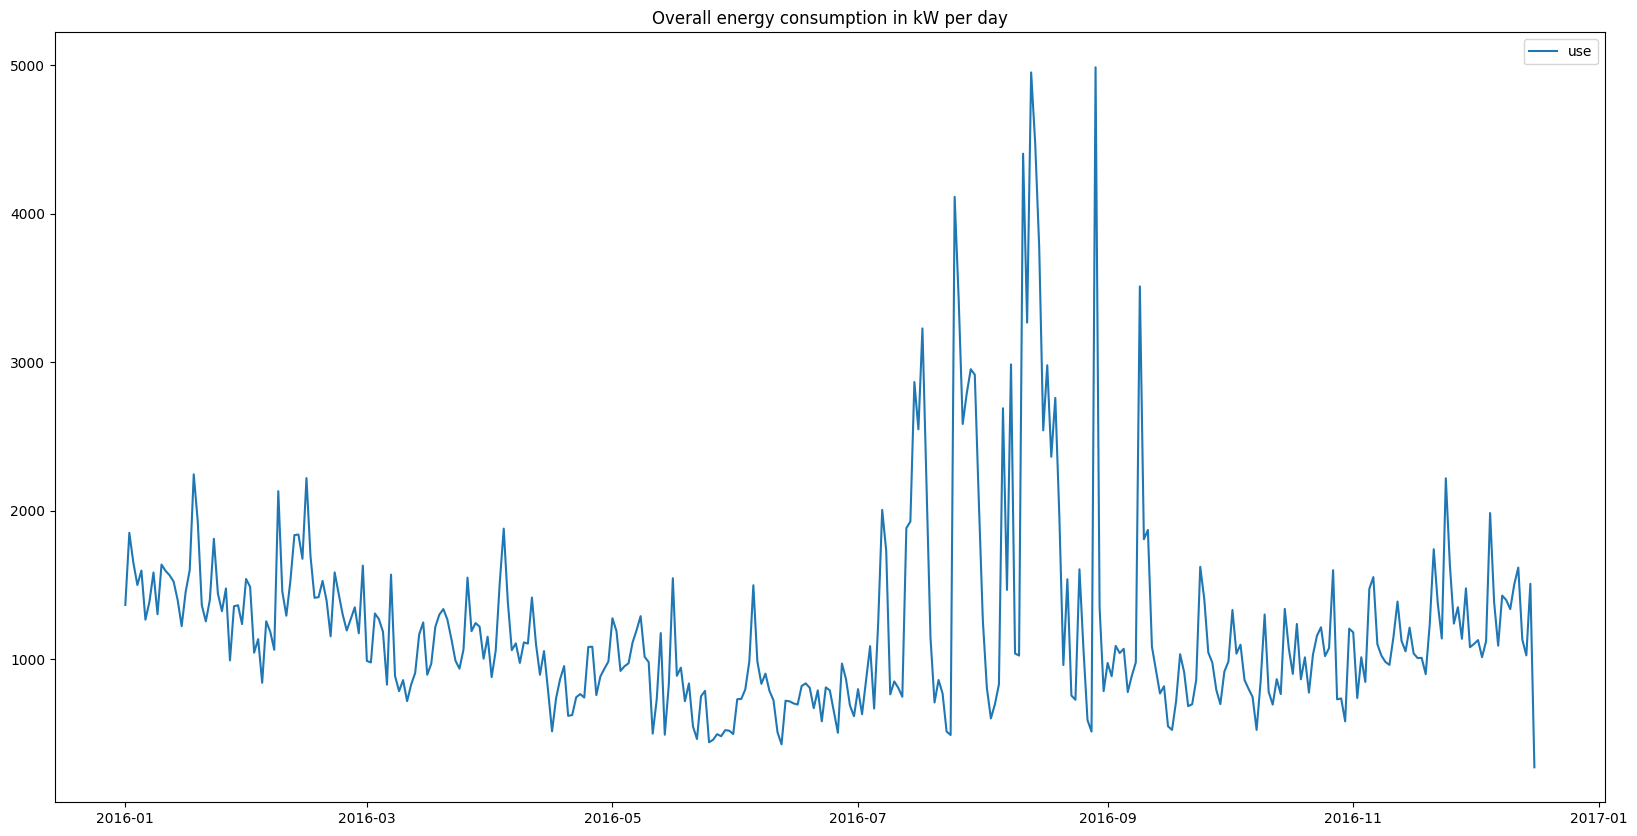

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per day")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_day.filter(items=['use']), dashes=False)

<Axes: title={'center': 'Overall energy consumption in kW per week'}>

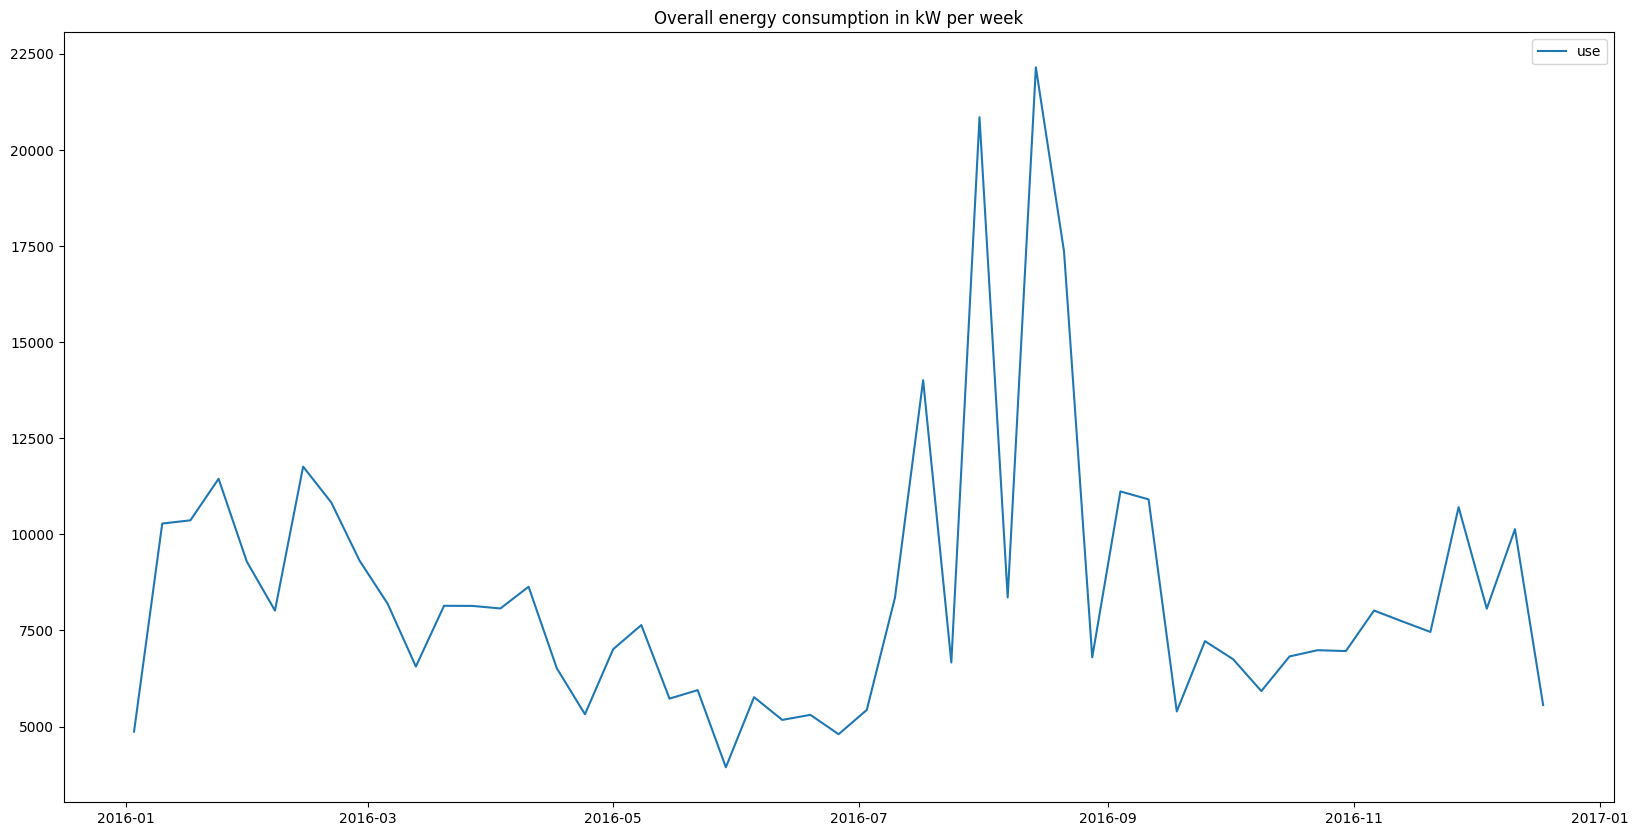

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per week")
#Plotting the energy consumption per week
sns.lineplot(data = energy_per_week.filter(items=['use']), dashes=False)

<Axes: title={'center': 'Overall energy consumption in kW per month'}>

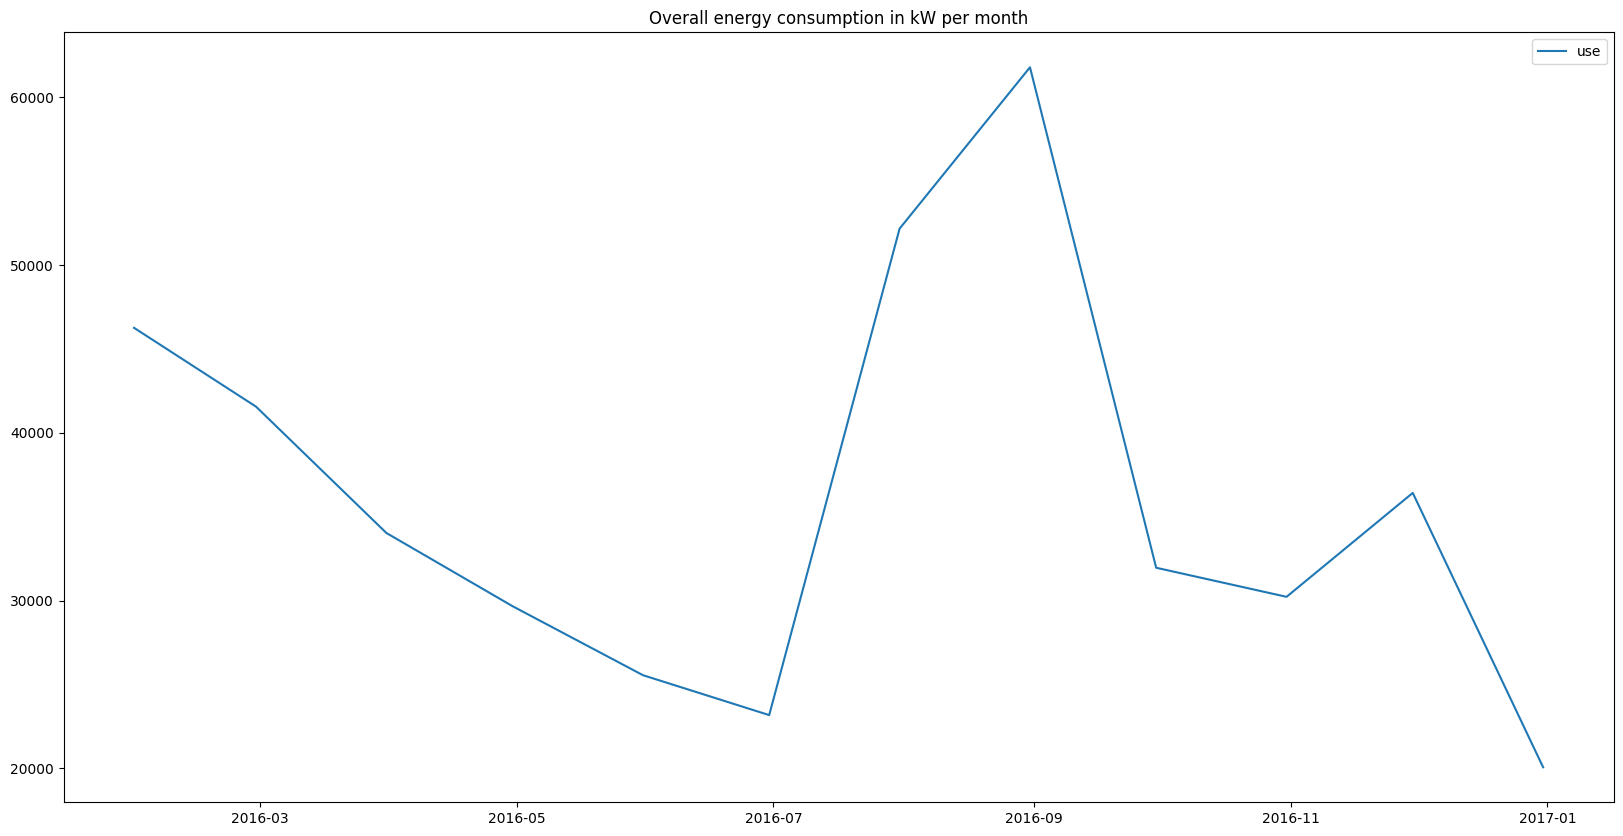

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per month")
#Plotting the energy consumption per month
sns.lineplot(data = energy_per_month.filter(items=['use']), dashes=False)

**August and September are the months with the highest energy consumption as per the above plot**

<Axes: title={'center': 'Energy consumption in kW per day by individual room/appliance'}>

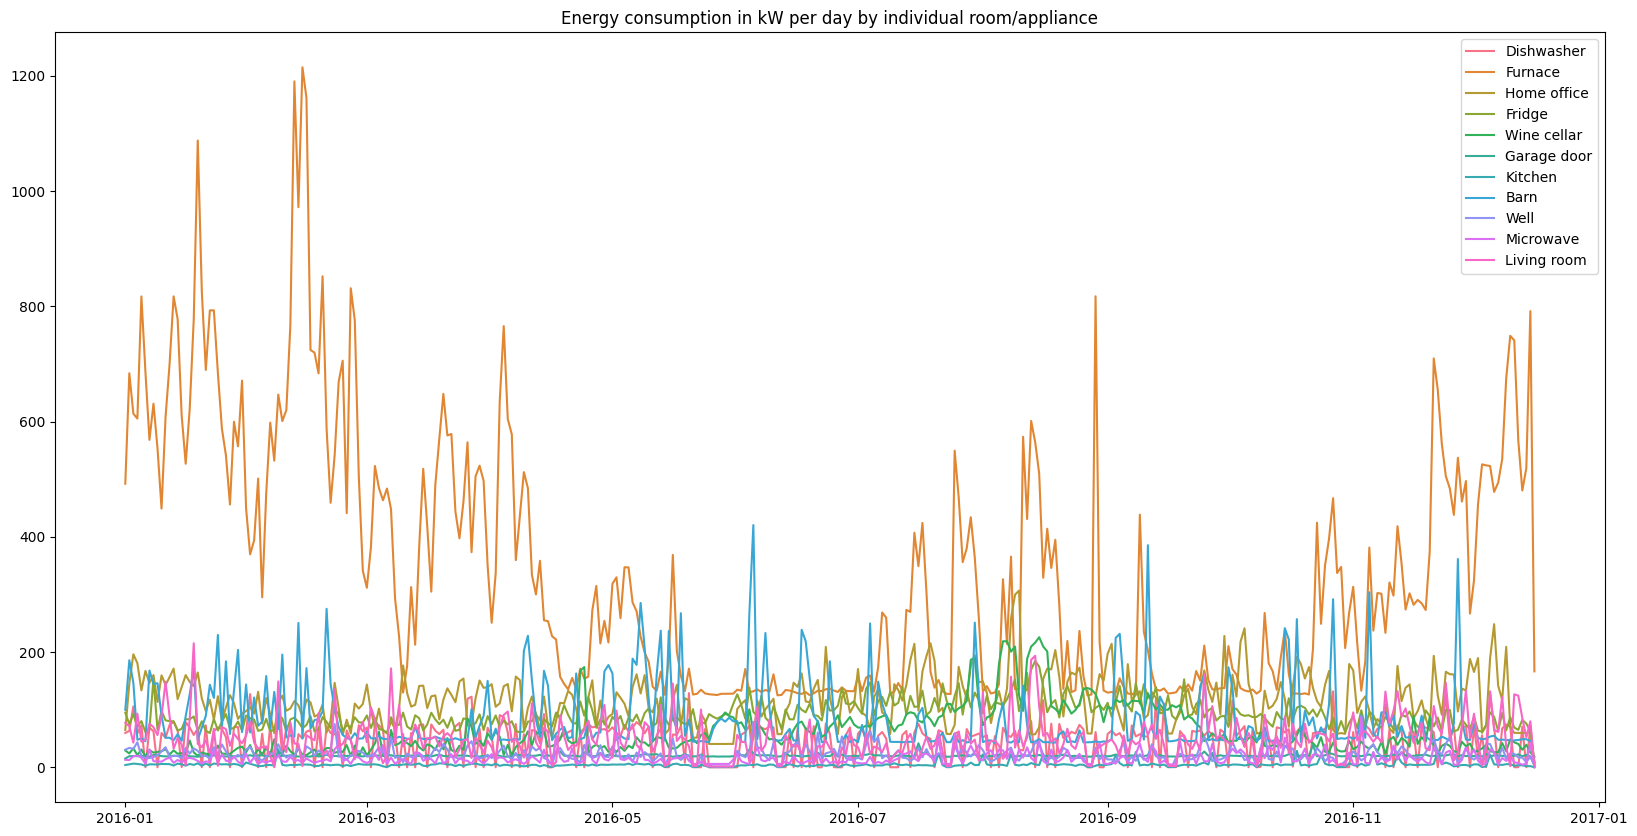

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per day by individual room/appliance")
sns.lineplot(data = energy_per_day.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

**The above plot indicates that furnace has the highest energy consumption among the rooms/devices in the smart home in a day**

<Axes: title={'center': 'Energy consumption in kW per month by individual room/appliance'}>

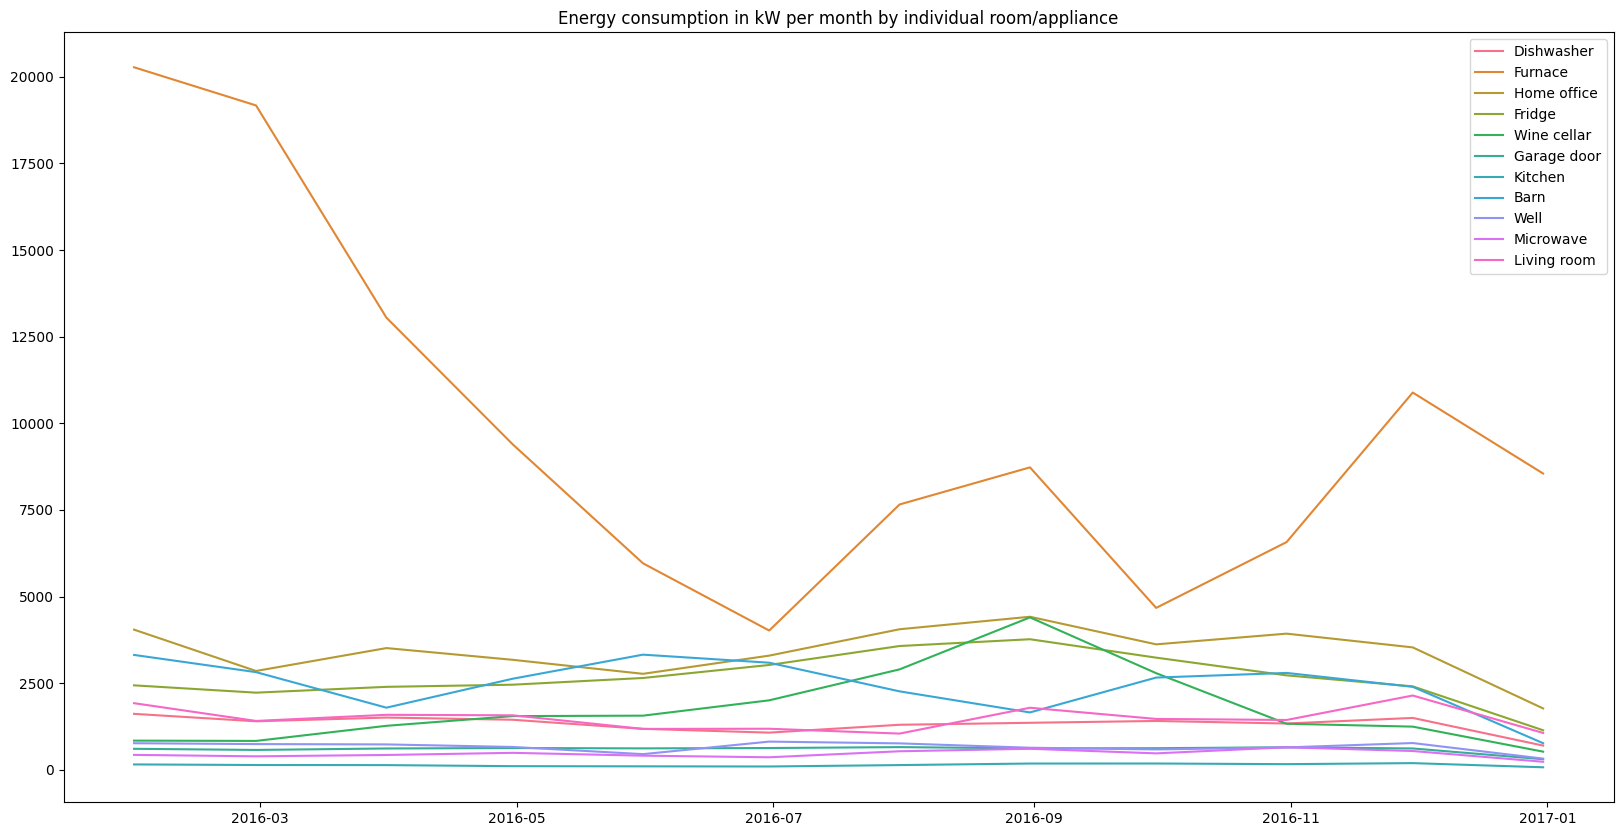

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per month by individual room/appliance")
sns.lineplot(data = energy_per_month.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

**The above plot indicates that furnace has the highest energy consumption among the rooms/devices and Kitchen has the lowest in the smart home in a month.**

In [ ]:
#Below we are splitting the energy consumption per month data into two sets.

#1) Energy consumed by each room in the house
energy_per_room = energy_per_month.filter(items=['Home office',
                                     'Wine cellar', 'Kitchen','Barn',
                                      'Living room'])

#2) Energy consumed by each device in the house
energy_per_device = energy_per_month.filter(items=[ 'Dishwasher',
                                     'Furnace','Fridge',
                                     'Garage door', 'Well',
                                     'Microwave'])

rooms_energy_consumption = energy_per_room.sum()
devices_energy_consumption = energy_per_device.sum()
print("Energy consumed in kW per month by each room in the house")
print(rooms_energy_consumption)
print("Energy consumed in kW per month by each device in the house")
print(devices_energy_consumption)

Energy consumed in kW per month by each room in the house
Home office    40961.277962
Wine cellar    21233.079320
Kitchen         1644.062194
Barn           29493.633696
Living room    17794.476716
dtype: float64
Energy consumed in kW per month by each device in the house
Dishwasher      15806.409510
Furnace        118917.457954
Fridge          32026.710600
Garage door      7124.847316
Well             7882.163852
Microwave        5534.440218
dtype: float64


****

Text(0.5, 1.0, 'Energy consumption in kW by each room in the house')

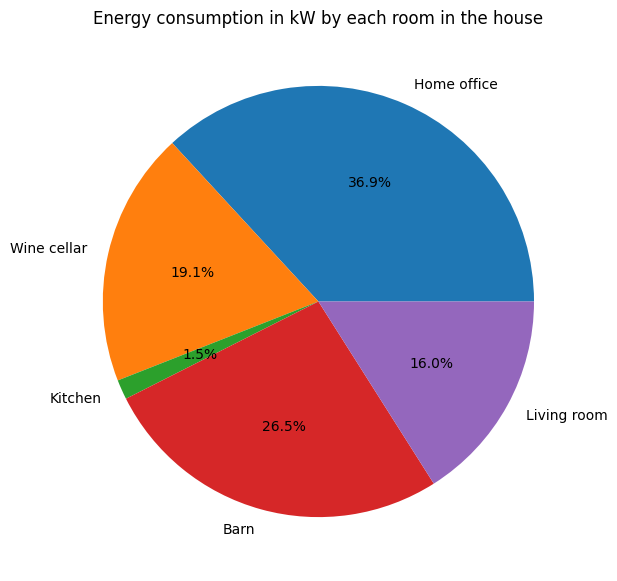

In [ ]:
plot = rooms_energy_consumption .plot(kind = "pie", figsize = (7,7),autopct='%1.1f%%')
plot.set_title("Energy consumption in kW by each room in the house")

**Home office has the highest energy consumption and kitchen the lowest among all the rooms in the house.**

In [ ]:
plot = devices_energy_consumption .plot(kind = "pie", figsize = (7,7),autopct='%1.1f%%')
plot.set_title("Energy consumption in kW by each device in the house")

Text(0.5, 1.0, 'Energy consumption in kW by each device in the house')

**Furnace has the highest energy consumption and Microwave has the lowest among all the devices in the house.**

## Part 4 - Correlation between features

In [ ]:
#Correlation of energy usage by home appliances

energy_corr = energy_data.loc[:,'Dishwasher':].corr()
fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(energy_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation of Energy Usage by appliances", size=15)
plt.show()

**No significant relationship between features, positive or negative, was observed. It is safe to presume that there is no interdependency between appliances when it comes to energy consumption.**

In [ ]:
#Correlation between weather data

weather_corr = weather_data.corr()
fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(weather_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between Weather Data", size=15)
plt.show()

**Strong positive correlation is observed here between some weather features:**
**1. temperature and apparentTemperature (0.99)**
**2. temperature and dewPoint (0.89)**
**3. apparentTemperature and dewPoint (0.9)**

In [ ]:
# Merge energy and weather datasets
allData_df = pd.merge(energy_data.loc[:,'Dishwasher':], weather_data, left_index=True, right_index=True)
allData_df.head()

Dishwasher   Furnace  Home office    Fridge  Wine cellar  \
2016-01-01 05:00:00    0.000033  0.082617     0.442633  0.124150     0.006983   
2016-01-01 05:01:00    0.000000  0.084533     0.444067  0.124000     0.006983   
2016-01-01 05:02:00    0.000017  0.083017     0.446067  0.123533     0.006983   
2016-01-01 05:03:00    0.000017  0.175417     0.446583  0.123133     0.006983   
2016-01-01 05:04:00    0.000133  0.300917     0.446533  0.122850     0.006850   

                     Garage door   Kitchen      Barn      Well  Microwave  \
2016-01-01 05:00:00     0.013083  0.000189  0.031350  0.001017   0.004067   
2016-01-01 05:01:00     0.013117  0.000189  0.031500  0.001017   0.004067   
2016-01-01 05:02:00     0.013083  0.000206  0.031517  0.001000   0.004067   
2016-01-01 05:03:00     0.013000  0.000217  0.031500  0.001017   0.004067   
2016-01-01 05:04:00     0.012783  0.000261  0.031500  0.001017   0.004067   

                     Living room  temperature  humidity  visibility  \
2016-01-01 05:00:00     0.001517        36.14      0.62        10.0   
2016-01-01 05:01:00     0.001650        36.14      0.62        10.0   
2016-01-01 05:02:00     0.001650        36.14      0.62        10.0   
2016-01-01 05:03:00     0.001617        36.14      0.62        10.0   
2016-01-01 05:04:00     0.001583        36.14      0.62        10.0   

                     apparentTemperature  pressure  windSpeed  windBearing  \
2016-01-01 05:00:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:01:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:02:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:03:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:04:00                29.26   1016.91       9.18        282.0   

                     dewPoint  
2016-01-01 05:00:00      24.4  
2016-01-01 05:01:00      24.4  
2016-01-01 05:02:00      24.4  
2016-01-01 05:03:00      24.4  
2016-01-01 05:04:00      24.4

In [ ]:
#Correlation between all data

all_corr = allData_df.corr()
fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(all_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between all Data", size=15)
plt.show()

**Weak correlation between wine cellar and weather features like dewPoint(0.3), apparentTemperature(0.29) and temperature(0.29).
Relationships observed between other features as well, but not as significant.**

## Part 5 - Time Series Analysis

In [ ]:
# define function to convert hour to time of day

def convertHourToPartOfDay(x):
    if x in [22,23,0,1,2,3]:
        part = 'Night'
    elif x in range(4, 12):
        part = 'Morning'
    elif x in range(12, 17):
        part = 'Afternoon'
    elif x in range(17, 22):
        part = 'Evening'
    else:
        part = 'X'
    return part

In [ ]:
# define function to group by time of day

def groupByPartOfDay(column):
    partOfDayDf = energy_per_part_of_day.groupby('part').agg({column:['mean']})
    partOfDayDf.columns = [f"{i[0]}_{i[1]}" for i in partOfDayDf.columns]
    partOfDayDf['part_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in partOfDayDf.index]
    partOfDayDf.sort_values('part_num', inplace=True)
    partOfDayDf.drop('part_num', axis=1, inplace=True)
    return partOfDayDf

In [ ]:
# create column to indicate time of day in dataset

energy_per_part_of_day = energy_data.loc[:]
energy_per_part_of_day['hour'] = energy_per_part_of_day.index.map(lambda x: x.hour)
energy_per_part_of_day['part'] = energy_per_part_of_day['hour'].apply(convertHourToPartOfDay)

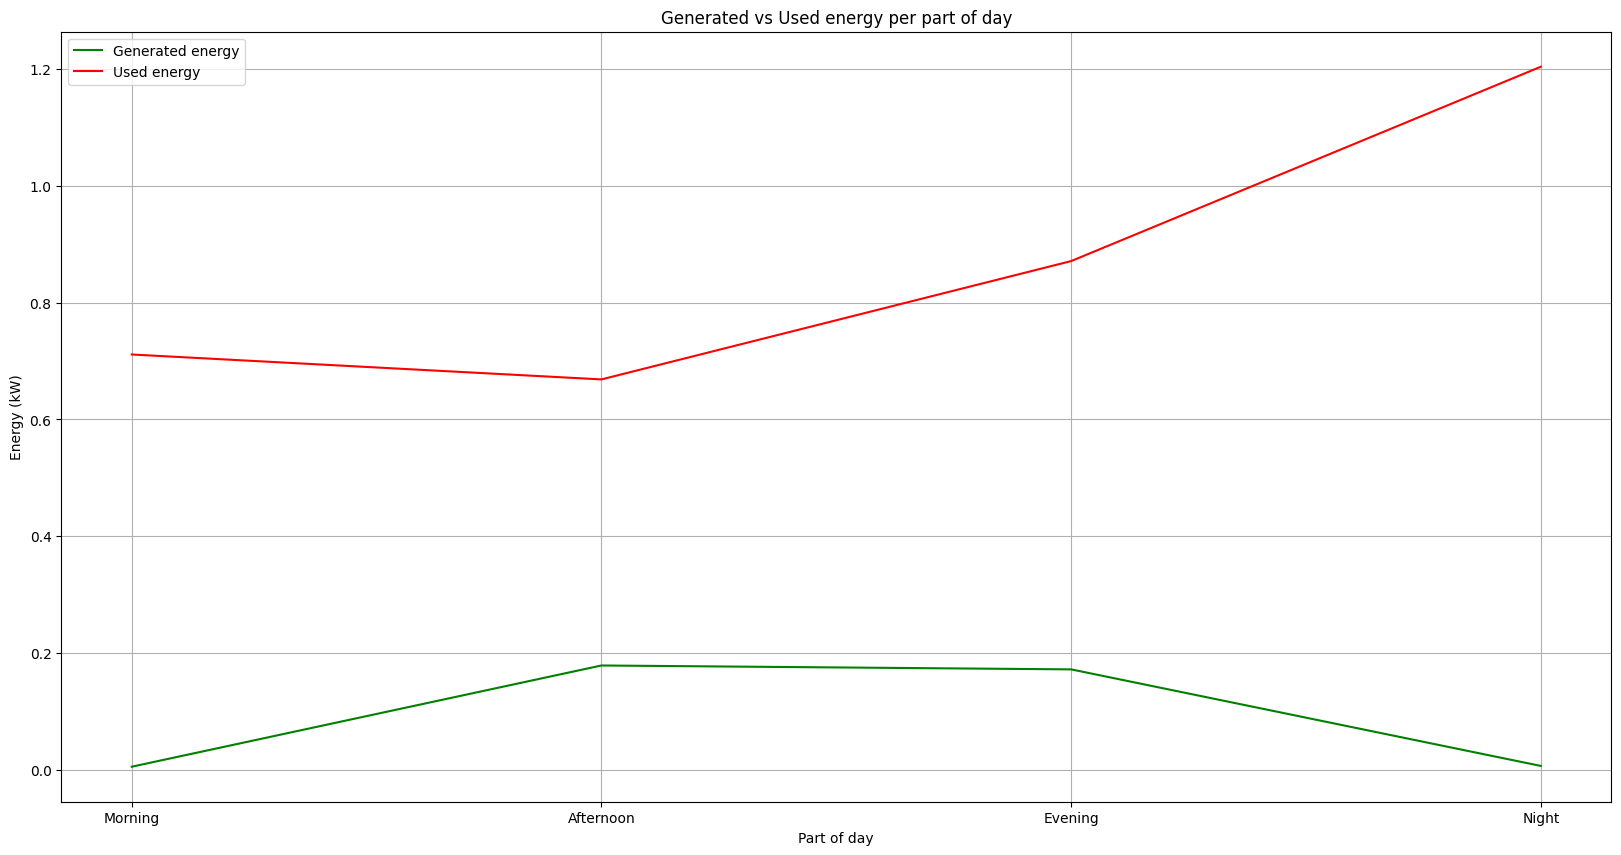

In [ ]:
# Plot generated vs used energy per part of day

plt.figure(figsize=(20,10))
plt.plot(groupByPartOfDay('gen'), 'g', label='Generated energy')
plt.plot(groupByPartOfDay('use'), 'r', label='Used energy')
plt.title('Generated vs Used energy per part of day')
plt.ylabel('Energy (kW)')
plt.xlabel('Part of day')
plt.legend()
plt.grid(True)
plt.show()

**Highest energy usage is observed during evening and night. The energy generation is relatively higher during afternoon and evening.**

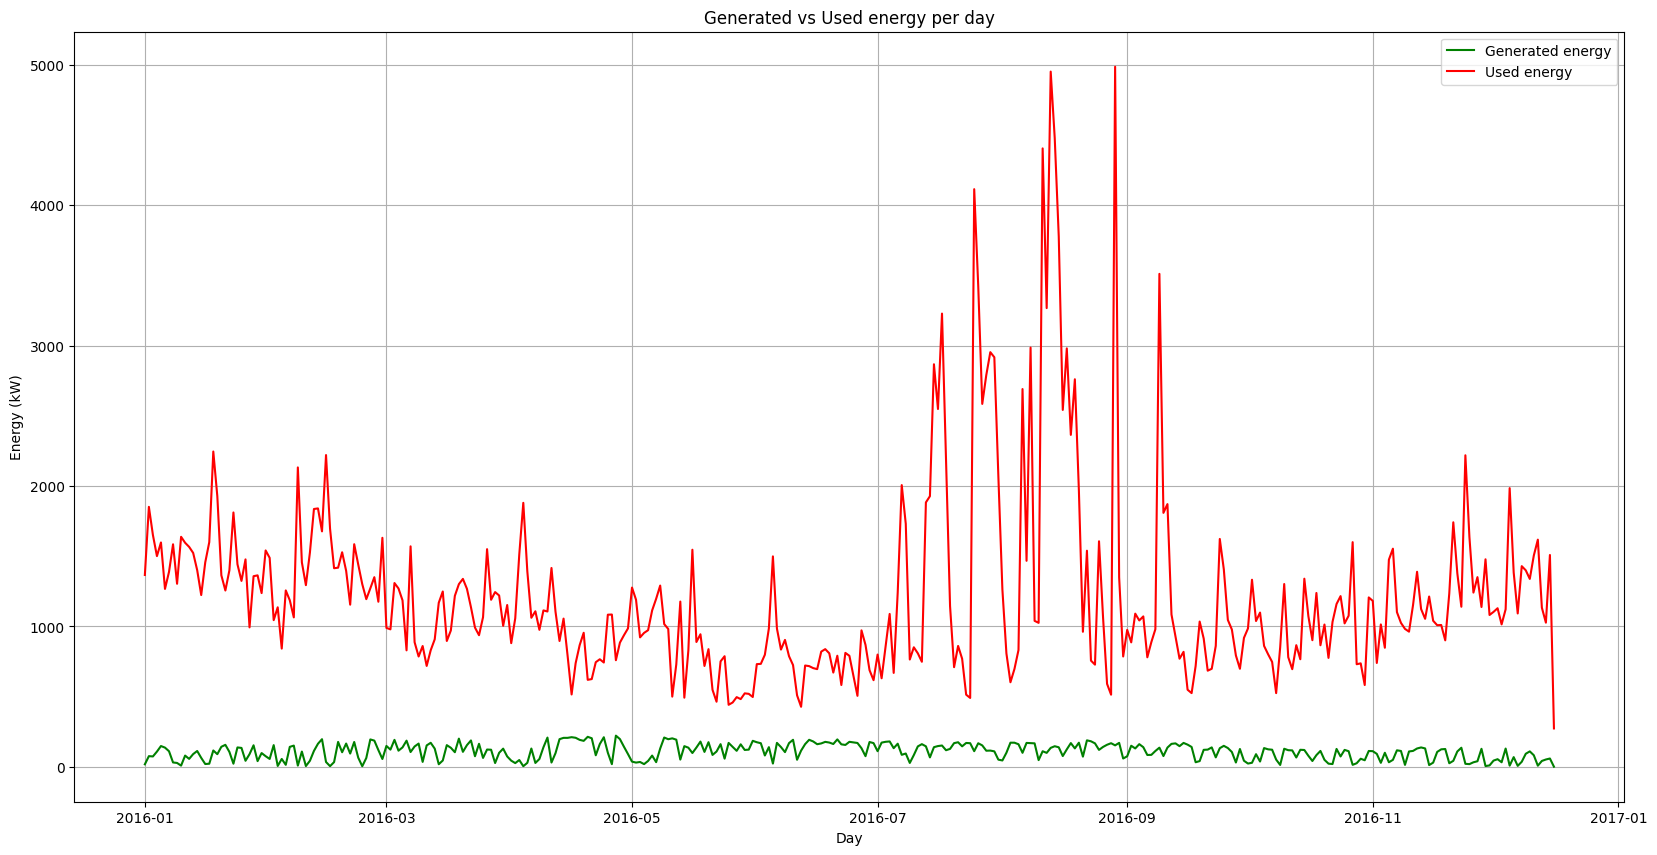

In [ ]:
# Plot generated vs used energy per day

plt.figure(figsize=(20,10))
plt.plot(energy_per_day.gen, 'g', label='Generated energy')
plt.plot(energy_per_day.use, 'r', label='Used energy')
plt.title('Generated vs Used energy per day')
plt.ylabel('Energy (kW)')
plt.xlabel('Day')
plt.legend()
plt.grid(True)
plt.show()

**Highest energy usage is observed in the days between July and September. The energy generation is mostly consistent throughtout the year.**

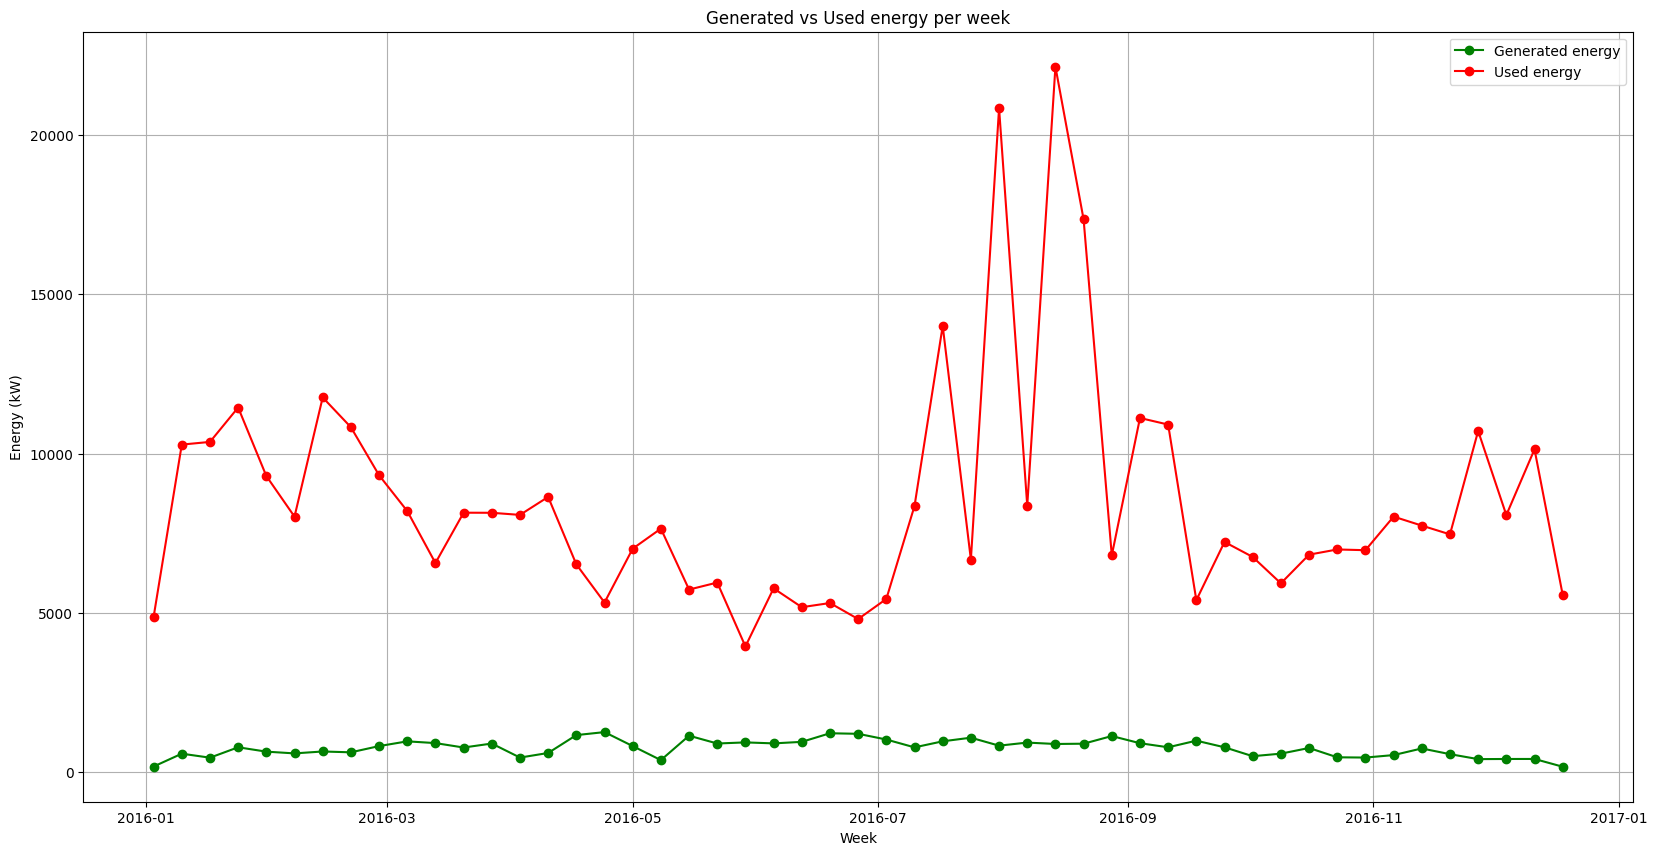

In [ ]:
# Plot generated vs used energy per week

plt.figure(figsize=(20,10))
plt.plot(energy_per_week.gen, 'go-', label='Generated energy')
plt.plot(energy_per_week.use, 'ro-', label='Used energy')
plt.title('Generated vs Used energy per week')
plt.ylabel('Energy (kW)')
plt.xlabel('Week')
plt.grid(True)
plt.legend()
plt.show()

**Highest energy usage is observed in the weeks between July and September. The energy generation is slightly high in the weeks between April and May but mostly consistent.**

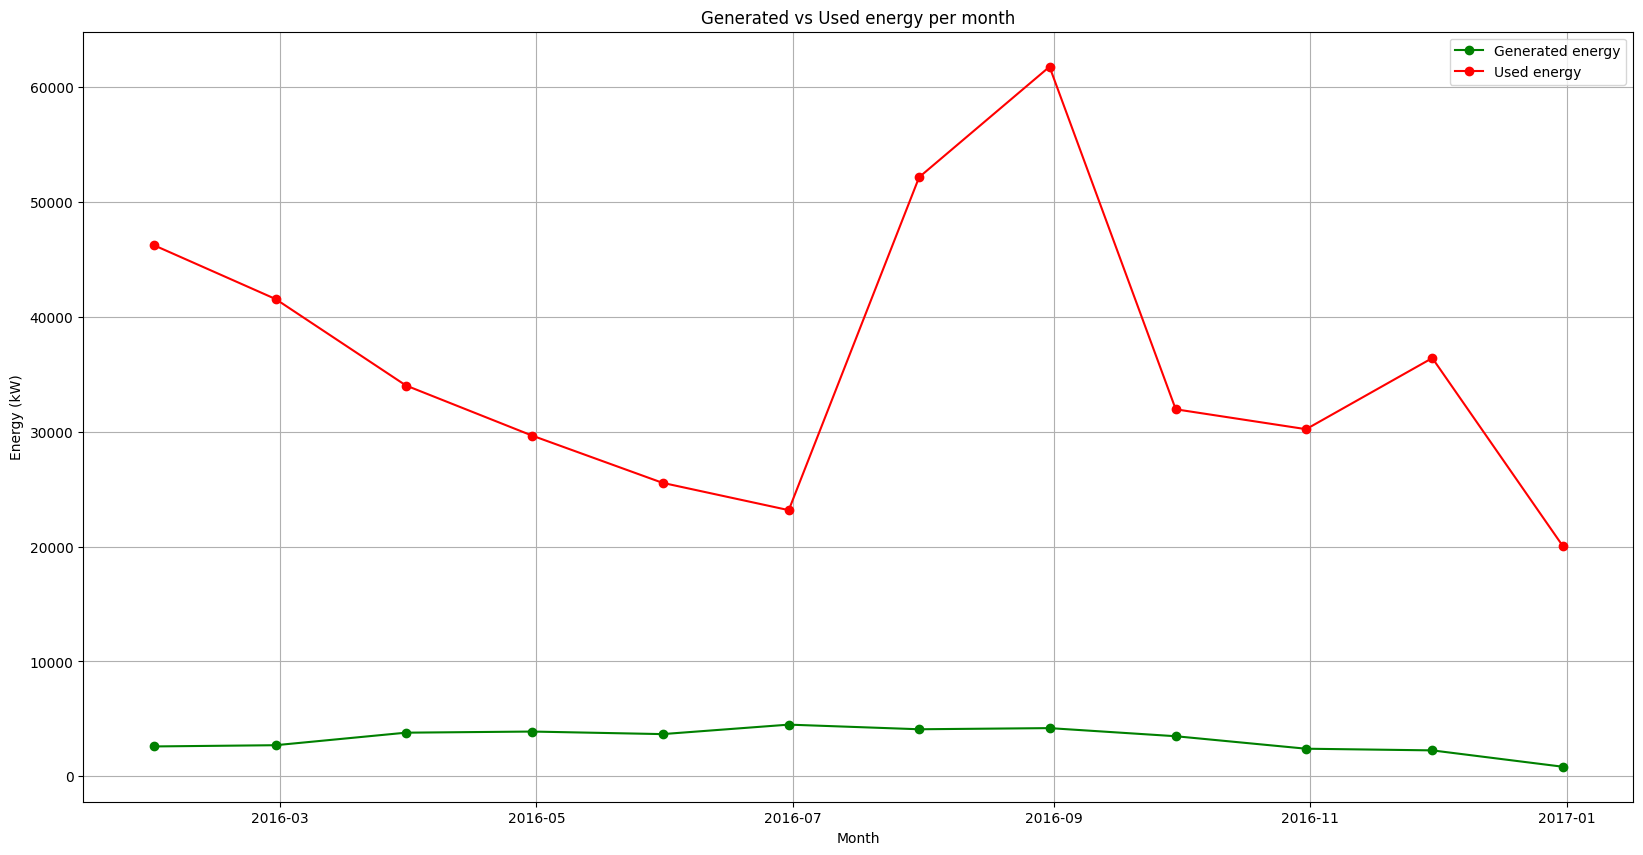

In [ ]:
# Plot generated vs used energy per month

plt.figure(figsize=(20,10))
plt.plot(energy_per_month.gen, 'go-', label='Generated energy')
plt.plot(energy_per_month.use, 'ro-', label='Used energy')
plt.title('Generated vs Used energy per month')
plt.ylabel('Energy (kW)')
plt.xlabel('Month')
plt.grid(True)
plt.legend()
plt.show()

**Highest energy usage is observed in the month of September. Months like August, February, March, April and December show high usage as well. The energy generation is slightly high in the month of July but mostly consistent.**

## 3 main factors of Time-Series Analysis:
### 1. Autocorrelation
### 2. Seasonality
### 3. Stationarity

**1. Autocorrelation**

Autocorrelation for 'gen' =  0.4124176621101414


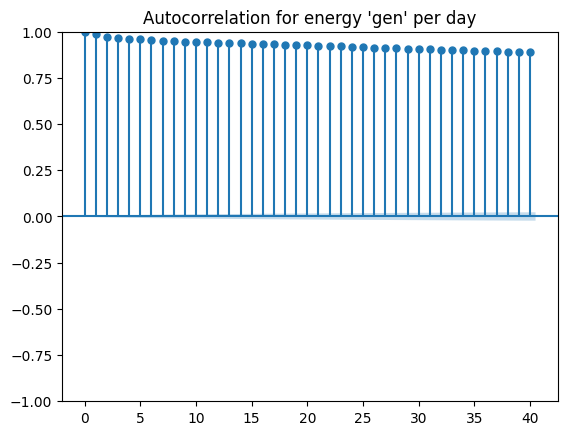

In [ ]:
#Plot ACF for energy 'gen'

print("Autocorrelation for 'gen' = ", energy_per_day['gen'].autocorr())
fig = plot_acf(energy_data['gen'], lags=40, title="Autocorrelation for energy 'gen' per day")
plt.show()

**Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.41.**

Autocorrelation for 'use' =  0.6107009825029094


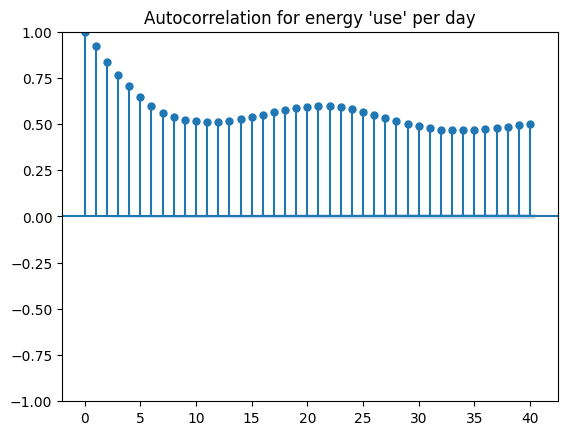

In [ ]:
#Plot ACF for energy 'use'

print("Autocorrelation for 'use' = ", energy_per_day['use'].autocorr())
fig = plot_acf(energy_data['use'], lags=40, title="Autocorrelation for energy 'use' per day")
plt.show()

**Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.61.**

**2. Seasonality**

In [ ]:
#Seasonal decomposition is performed on the dataset to see if there is seasonality displayed in the per-day dataset at a frequency of 30 days(monthly)

result = seasonal_decompose(energy_per_day['use'], model='additive', period=30)
result.plot()
plt.show()

**It is observed in the figure above that the per-day dataset displays a seasonal behavior at a frequency of 30**

**3. Stationarity**

In [ ]:
# split the dataset into two, and calculate mean and variance for both subsets

X = energy_data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.113294, mean2=0.121690
variance1=0.092859, variance2=0.212700


**The dataset is splitted into two contiguous halves. Mean and variance is calculated for each subset. There is a little difference observed but it can be concluded that the values are essentially in the same ballpark.**

## Part 6 - Anomaly Detection


In [ ]:
data = energy_per_day.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


gen    scores  anomaly
2016-01-01   18.026200 -0.056904       -1
2016-01-02   76.051300  0.019834        1
2016-01-03   74.081433  0.007107        1
2016-01-04  108.525017  0.039470        1
2016-01-05  148.107500  0.005595        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                  gen    scores  anomaly
2016-01-01  18.026200 -0.056904       -1
2016-01-10   8.630967 -0.058039       -1
2016-01-11  80.069550 -0.008755       -1
2016-01-12  56.725133 -0.019982       -1
2016-01-13  90.764867 -0.011594       -1
...               ...       ...      ...
2016-12-11  82.472550 -0.001941       -1
2016-12-12   8.129833 -0.074511       -1
2016-12-14  52.339200 -0.020089       -1
2016-12-15  59.329550 -0.026006       -1
2016-12-16   0.846800 -0.175253       -1

[138 rows x 3 columns]


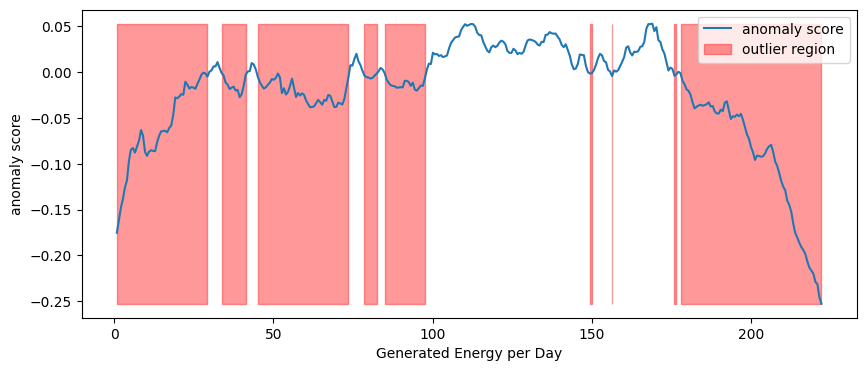

In [ ]:
# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Day')
plt.show();

In [ ]:
data = energy_per_week.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


gen    scores  anomaly
2016-01-03  168.158933 -0.204238       -1
2016-01-10  572.221083  0.047137        1
2016-01-17  446.667833  0.014443        1
2016-01-24  773.163450  0.067281        1
2016-01-31  636.354167 -0.000412       -1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    gen    scores  anomaly
2016-01-03   168.158933 -0.204238       -1
2016-01-31   636.354167 -0.000412       -1
2016-02-14   641.294017 -0.005879       -1
2016-02-21   614.921483 -0.005579       -1
2016-04-17  1156.077233 -0.060530       -1
2016-04-24  1250.095367 -0.157075       -1
2016-05-08   370.034400 -0.120026       -1
2016-05-15  1137.199400 -0.033476       -1
2016-06-19  1213.810100 -0.086006       -1
2016-06-26  1196.532800 -0.073791       -1
2016-07-03  1016.893800 -0.037704       -1
2016-07-24  1074.534750 -0.081707       -1
2016-08-28  1126.103650 -0.057968       -1
2016-10-02   493.448750 -0.031315       -1
2016-11-06   528.045984 -0.013476       -1
2016-11-13   736.429117 -0.016004       -1
2016-11-27   401.291433 -0.024777       -1
2016-12-11   406.476017 -0.002927       -1
2016-12-18   162.635350 -0.207725       -1


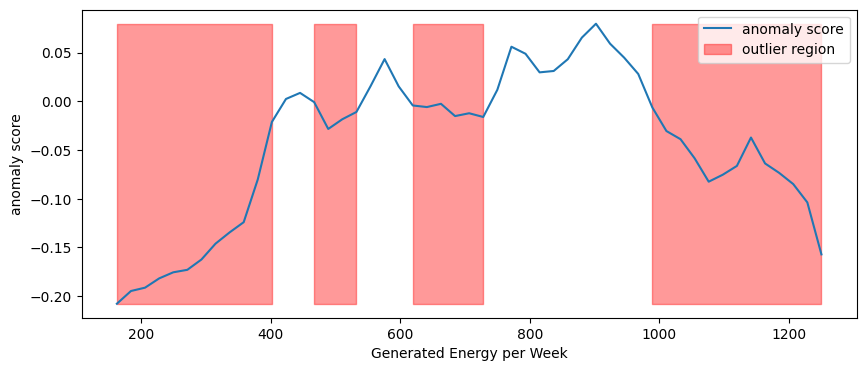

In [ ]:
# Distribution of generated energy per week
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Week')
plt.show();

In [ ]:
data = energy_per_month.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


gen    scores  anomaly
2016-01-31  2596.565467  0.049466        1
2016-02-29  2704.221700  0.032298        1
2016-03-31  3795.807367  0.082470        1
2016-04-30  3893.534950  0.074830        1
2016-05-31  3670.712050  0.069132        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    gen    scores  anomaly
2016-06-30  4496.177683 -0.111116       -1
2016-12-31   830.825233 -0.222061       -1


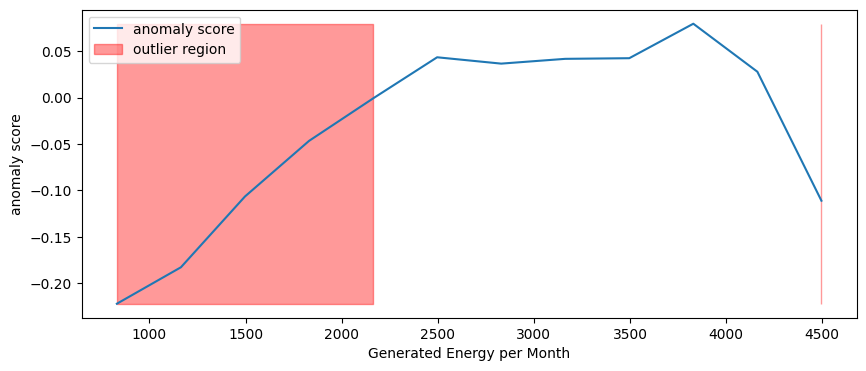

In [ ]:
# Distribution of generated energy per month
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Month')
plt.show();

In [ ]:
data = energy_per_day.filter(items=['use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['use']])
df['anomaly']=isolation_forest.predict(df[['use']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


use    scores  anomaly
2016-01-01  1366.269517  0.049784        1
2016-01-02  1851.521067 -0.021534       -1
2016-01-03  1651.128133 -0.018565       -1
2016-01-04  1500.686017  0.036256        1
2016-01-05  1597.968867  0.037865        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    use    scores  anomaly
2016-01-02  1851.521067 -0.021534       -1
2016-01-03  1651.128133 -0.018565       -1
2016-01-18  2245.475367 -0.088664       -1
2016-01-19  1927.057417 -0.043415       -1
2016-01-23  1811.468983 -0.041080       -1
...                 ...       ...      ...
2016-10-30   582.650200 -0.021013       -1
2016-11-21  1741.470633 -0.046917       -1
2016-11-24  2218.692083 -0.072464       -1
2016-12-05  1984.813883 -0.054921       -1
2016-12-16   273.442767 -0.226408       -1

[66 rows x 3 columns]


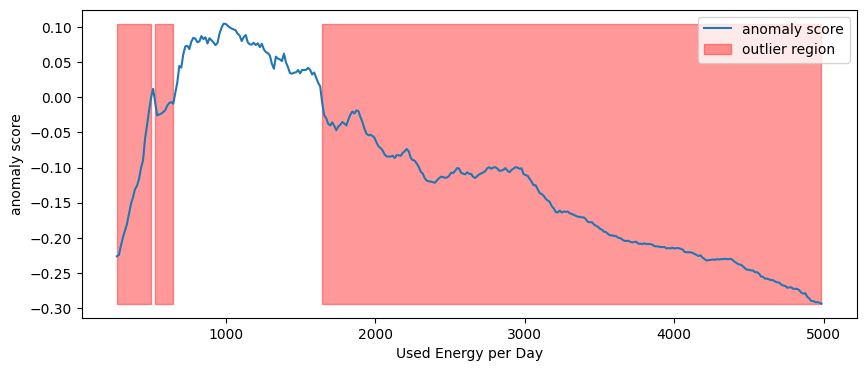

In [ ]:
# Distribution of use energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Day')
plt.show();

In [ ]:
data = energy_per_week.filter(items=['use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['use']])
df['anomaly']=isolation_forest.predict(df[['use']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


use    scores  anomaly
2016-01-03   4868.918717 -0.017932       -1
2016-01-10  10281.065683  0.036165        1
2016-01-17  10365.530000  0.034530        1
2016-01-24  11446.274100 -0.005761       -1
2016-01-31   9294.364817  0.016191        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                     use    scores  anomaly
2016-01-03   4868.918717 -0.017932       -1
2016-01-24  11446.274100 -0.005761       -1
2016-02-14  11762.615333 -0.044645       -1
2016-05-29   3941.174633 -0.180591       -1
2016-06-26   4801.309567 -0.037795       -1
2016-07-17  14010.084417 -0.148534       -1
2016-07-31  20850.432700 -0.220420       -1
2016-08-14  22150.665567 -0.262143       -1
2016-08-21  17353.287067 -0.204238       -1


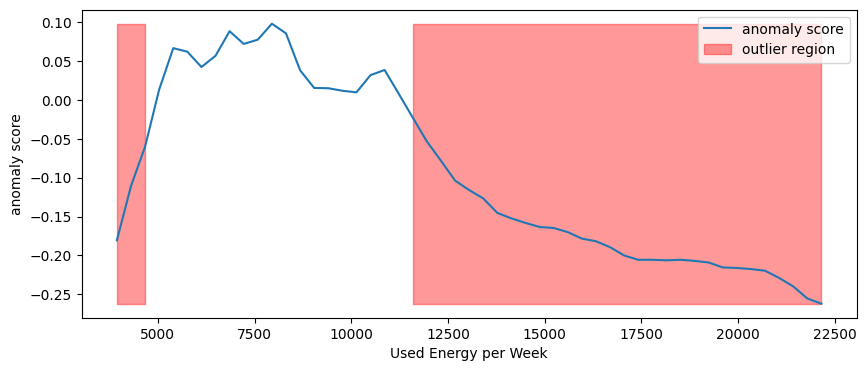

In [ ]:
# Distribution of use energy per week
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Week')
plt.show();

In [ ]:
data = energy_per_month.filter(items=['use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['use']])
df['anomaly']=isolation_forest.predict(df[['use']])
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


use    scores  anomaly
2016-01-31  46256.153317 -0.031300       -1
2016-02-29  41558.035267 -0.001168       -1
2016-03-31  34026.880883  0.084689        1
2016-04-30  29662.845900  0.091622        1
2016-05-31  25550.843150  0.040722        1

In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                     use    scores  anomaly
2016-01-31  46256.153317 -0.031300       -1
2016-02-29  41558.035267 -0.001168       -1
2016-07-31  52167.125350 -0.080405       -1
2016-08-31  61786.433333 -0.173234       -1
2016-12-31  20063.105200 -0.085870       -1


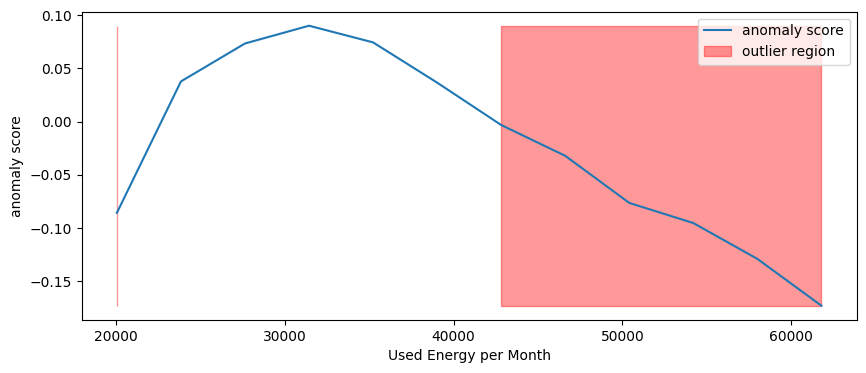

In [ ]:
# Distribution of use energy per month
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Month')
plt.show();

**Multivariate Anomaly Detection**

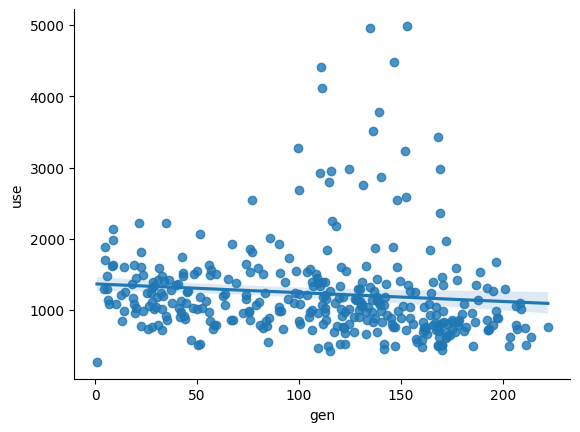

In [ ]:
# Generated vs Used Energy per day
sns.regplot(x="gen", y="use", data=energy_per_day)
sns.despine();

In [ ]:
# Generated vs Used Energy per week
sns.regplot(x="gen", y="use", data=energy_per_week)
sns.despine();

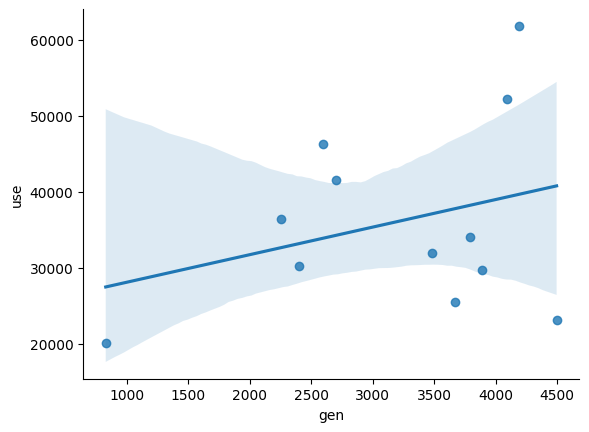

In [ ]:
# Generated vs Used Energy per month
sns.regplot(x="gen", y="use", data=energy_per_month)
sns.despine();

####Moving Average

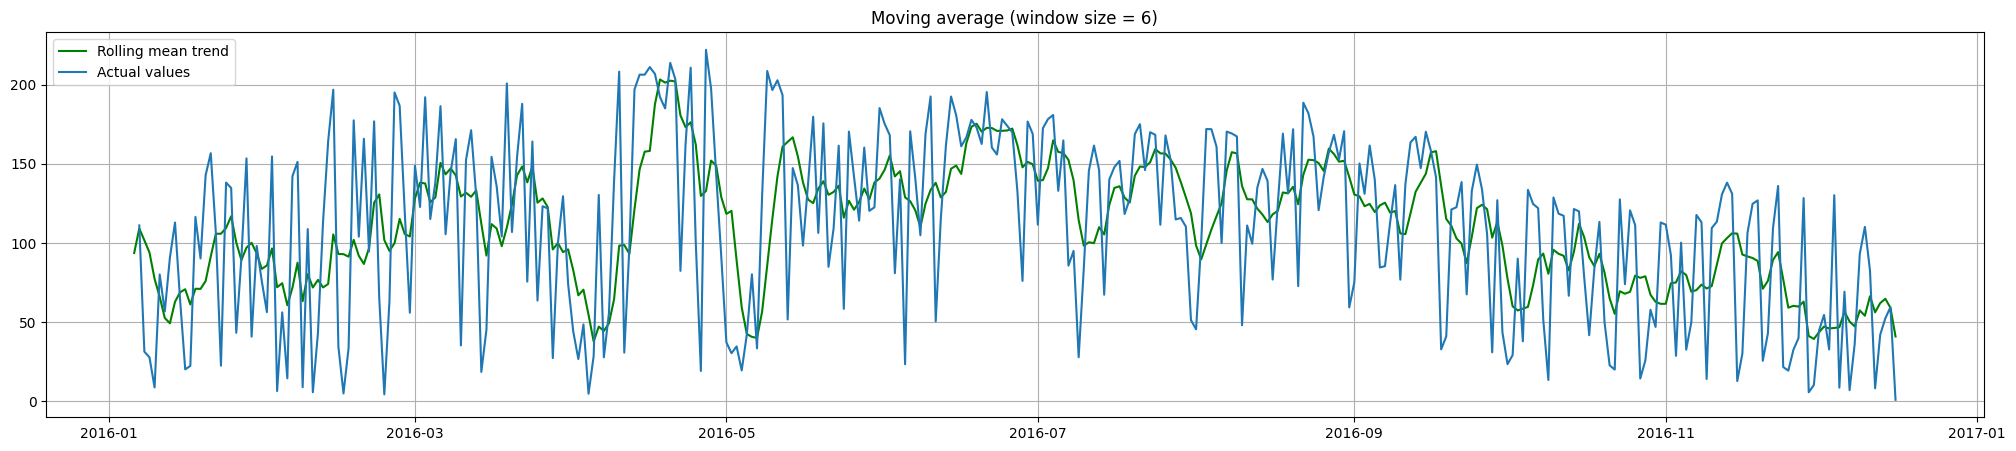

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(25,5))
  plt.title("Moving average (window size = {})".format(window))
  plt.plot(rolling_mean, "g", label="Rolling mean trend")

  # Plot confidence intervals for smoothed values
  if plot_intervals:
      mae = mean_absolute_error(series[window:], rolling_mean[window:])
      deviation = np.std(series[window:] - rolling_mean[window:])
      lower_bond = rolling_mean - (mae + scale * deviation)
      upper_bond = rolling_mean + (mae + scale * deviation)
      plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
      plt.plot(lower_bond, "r--")

      # Having the intervals, find abnormal values
      if plot_anomalies:
          anomalies = pd.DataFrame(index=series.index, columns=series.columns)
          anomalies[series<lower_bond] = series[series<lower_bond]
          anomalies[series>upper_bond] = series[series>upper_bond]
          plt.plot(anomalies, "ro", markersize=10)

  plt.plot(series[window:], label="Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)

n_samples = 24*30 # 1 month
data = energy_per_day.filter(items=['gen'])
plotMovingAverage(data[:n_samples], window=6) # A window of 6 hours

In [ ]:
plotMovingAverage(data[:n_samples], window=12) # A window of 12 hours

In [ ]:
plotMovingAverage(data[:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


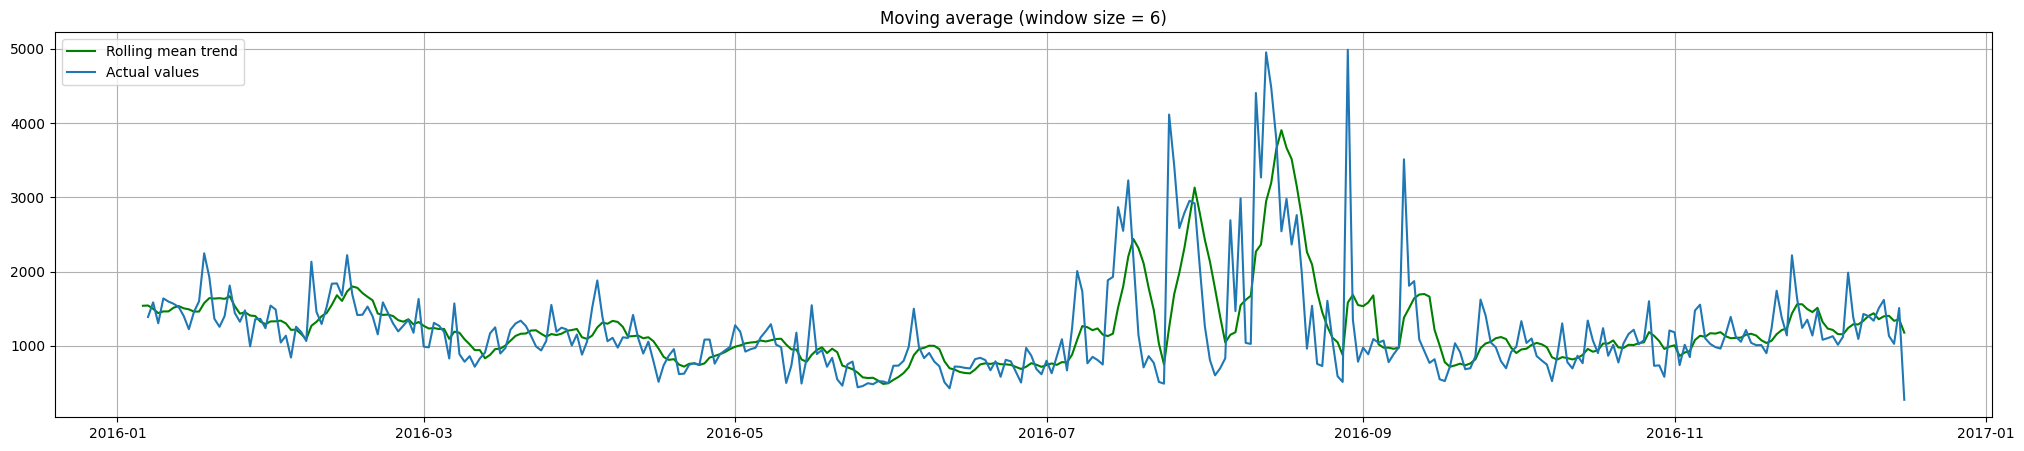

In [ ]:
data = energy_per_day.filter(items=['use'])
plotMovingAverage(data[:n_samples], window=6) # A window of 6 hours

In [ ]:
plotMovingAverage(data[:n_samples], window=12) # A window of 12 hours

In [ ]:
plotMovingAverage(data[:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


## Part 7 - Time Series Forecasting using ARIMA model

Autocorrelation for 'use' =  0.6107009825029094


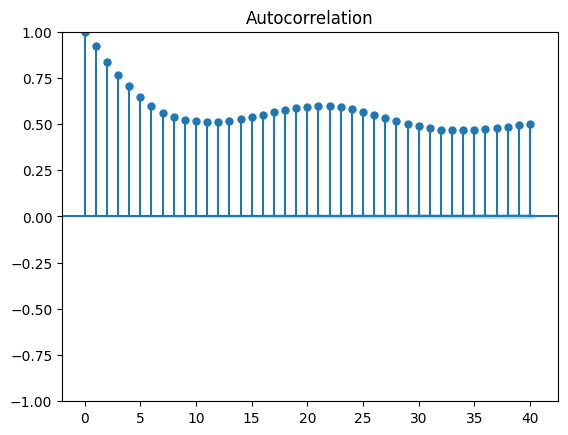

In [ ]:
#Autocorrelation plot is used to find the AR parameter p of the ARIMA model
print("Autocorrelation for 'use' = ", energy_per_day['use'].autocorr())
fig= plot_acf(energy_data['use'], lags=40)
plt.show()

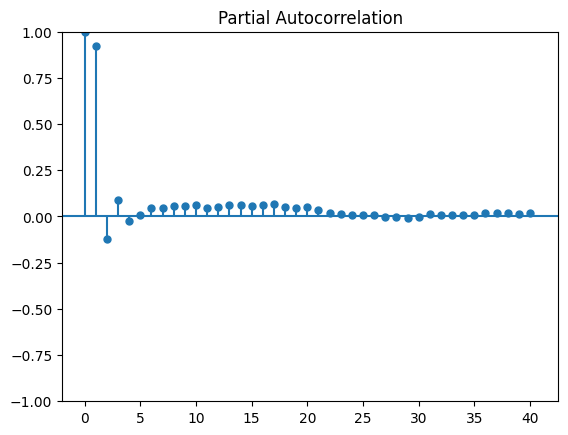

In [ ]:
plot_pacf(energy_data['use'], lags=40)

**PACF plot cuts of quickly after 5**

In [ ]:
#We initially trained the model on a resampled dataset with 20,000 records but since it takes a
#lot of time in the order of several hours depending on the p,d,q combinations of ARIMA we have
#resampled the data with just 2000 records for the convenience of reducing the time of execution


home_arima_df= home_df.sample(n=2000)

**We experimented with different p and q values keeping d=1 for the ARIMA model and found that we get the best results with p=5, d=1 and q=0. Keeping the value q=1 or 2 was taking too long to train the data(more than two hours) with 20,000 records where as with q=0 we were able to train the model just under one hour(3571.43seconds) as indicated in the screenshot.**

Screen Shot 2020-11-28 at 4.46.59 PM.png

**Training an ARIMA model**

predicted=0.485354, expected=1.607433
predicted=0.852773, expected=1.272983
predicted=0.789342, expected=0.318817
predicted=0.859807, expected=0.376800
predicted=0.680727, expected=0.891867
predicted=0.717285, expected=1.570783
predicted=1.096964, expected=0.270350
predicted=0.721067, expected=1.069000
predicted=0.805869, expected=0.834883
predicted=0.790695, expected=1.662350
predicted=1.113339, expected=0.311917
predicted=0.888610, expected=0.936383
predicted=0.859810, expected=0.257683
predicted=0.778753, expected=1.766933
predicted=1.067283, expected=0.594783
predicted=0.886649, expected=0.414667
predicted=0.671718, expected=0.308117
predicted=0.702163, expected=0.680250
predicted=0.642071, expected=0.392117
predicted=0.712990, expected=0.419983
predicted=0.476641, expected=0.556517
predicted=0.474970, expected=0.863417
predicted=0.556737, expected=0.754683
predicted=0.622516, expected=0.495967
predicted=0.558815, expected=4.777100
predicted=1.710810, expected=0.601733
predicted=1.

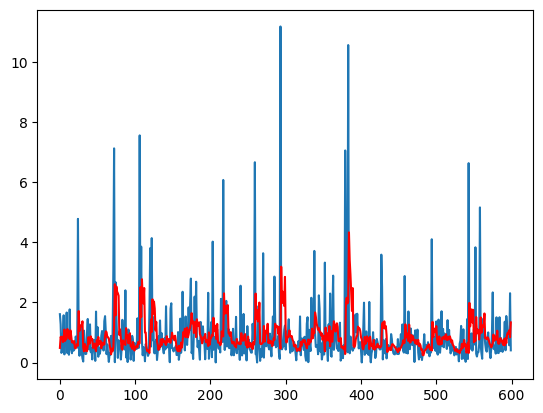

In [ ]:
#Trained on the the parameter values p=5, d=1 and q=0
#from statsmodels.tsa.arima_model import ARIMA  <-- Old import statement
from statsmodels.tsa.arima.model import ARIMA # <-- New import statement
from sklearn.metrics import mean_squared_error
import time

X = home_arima_df['use'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
start_time= time.time()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
end_time= time.time()
time_taken= end_time-start_time
print('Time taken to train the model in seconds= ',time_taken)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Residual Analysis of the ARIMA model**

<Axes: >

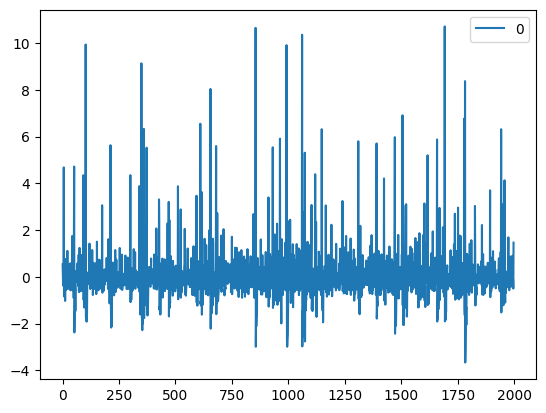

In [ ]:
from pandas import DataFrame
#We get the information if the model is accurate from the residual analysis
residuals= DataFrame(model_fit.resid)
residuals.plot()

**There is no visible trend or pattern in the residuals plot which indicates our model is accurate**

In [ ]:
residuals.describe()

0
count  1999.000000
mean      0.001594
std       1.176215
min      -3.660709
25%      -0.479107
50%      -0.159641
75%       0.214125
max      10.704529

**The mean is centered around zero which indicates our model is accurate**

Screen Shot 2020-11-27 at 12.51.59 AM.png

**Above is the residual plot for the model trained on 20,000 records with the parameter values p=5, d=1 and q=0. It clearly indicates there is no visible trend or pattern in the plot and hence no correlation between the residuals which indicates our model is accurate.**

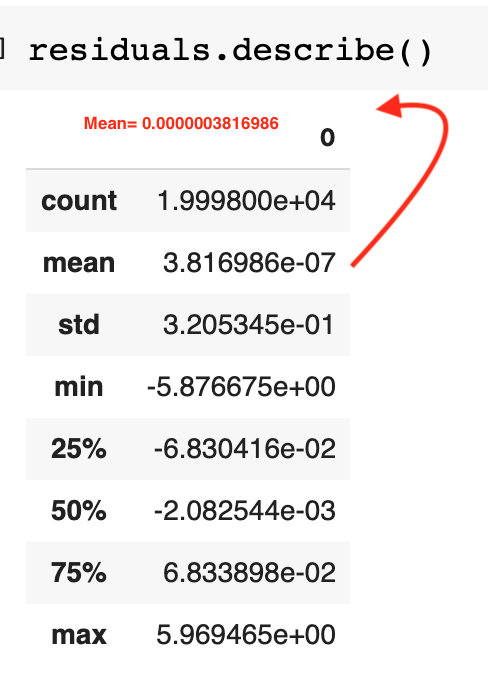

**The mean of the residuals is centered around 0 (3.816986e-07 = 0.0000003816986) for the model trained on 20,000 records which indicates our model is accurate**